In [1]:
import sys
sys.path.append('c:\\Users\\pizza\\OneDrive\\Documents\\GitHub\\ICL-DeepRL-wireless-power-allocation')

In [2]:
import pyglet
from pyglet.window import mouse
from pyglet.window import key
import numpy as np
from ToyProblem1.Environment import Environment
from ToyProblem1.Agent import Agent
from time import time

In [3]:
pyglet.canvas.get_display().get_default_screen()

Win32Screen(x=0, y=0, width=1920, height=1080)

In [4]:
nb_devices = 5


In [5]:
env = Environment()
env.make(nb_devices)

agent = Agent(nb_devices)
score_Hist = []
ALoss_Hist = []
CLoss_Hist = []

num_episodes = 30
num_actions = 100
for i in range(num_episodes):
    t0 = time()
    score = 0
    state_verb = env.reset()
    episode_Hist = []
    eALoss = []
    eCLoss = []
    for k in range(num_actions):
        t1 = time()
        state = [s[1] for s in state_verb]
        #print(state)
        id_list = [s[0] for s in state_verb]
        t2 = time()
        action_state = [s[:4] for s in state]
        #print(action_state)
        #print(state)
        minibatch = agent.get_minibatch(action_state, 3)
        labels = []
        for pv in minibatch:
            labels.append(env.apply_power(pv))

        critic_loss = agent.learn_critic(minibatch, labels)
        actions = agent.choose_action(action_state)
        #print(actions)
        t3 = time()
        episode = env.step(actions)
        t4 = time()
        #print(f"policy {actions} \npowers {[d.power for d in env.dList]}")
        #print(episode["r"])
        episode["s"] = [s[1] for s in episode["s"]]
        episode["s_"] = [s[1] for s in episode["s_"]]
        #env.render()
        t5 = time()
        actor_loss, critic_loss = agent.learn(episode)
        eALoss.append(actor_loss)
        eCLoss.append(critic_loss)
        score += episode["r"]
        episode_Hist.append(episode["r"])
        t6 = time()
        #print(f"1-2 {t2-t1}  2-3 {t3-t2}  3-4 {t4-t3}  4-5 {t5-t4}  5-6 {t6-t5}")
    score_Hist.append(score/num_actions)
    ALoss_Hist.append(np.mean(eALoss))
    CLoss_Hist.append(np.mean(eCLoss))

    print(f"episode {i} with score {score/num_actions}, which took {np.round(time() - t0, 3)}s")
    #print(f"rewards {episode_Hist} average {np.mean(episode_Hist)}")


(3, 5)
[[0.45482141 0.18410964 0.84726644 0.14516929 0.37351456]
 [0.0281229  0.90716898 0.96064514 0.89271879 0.37056848]
 [0.82830846 0.65375429 0.84407628 0.99226439 0.05216617]]


NameError: name 'learn_critic' is not defined

In [6]:
import matplotlib.pyplot as plt


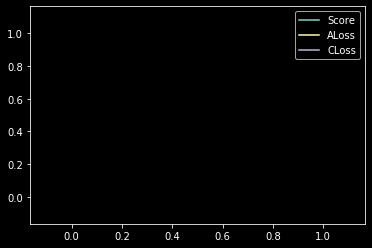

In [7]:
plt.plot(score_Hist)
plt.plot(ALoss_Hist)
plt.plot(CLoss_Hist)
plt.legend(["Score", "ALoss", "CLoss"])

In [8]:
print(env.objective())

9.807717105926045


In [9]:
def get_RA(L, window_size):
    T = []
    for i in range(window_size, len(L)-window_size):
        T.append(np.mean(L[i-window_size:i+window_size]))
    return T

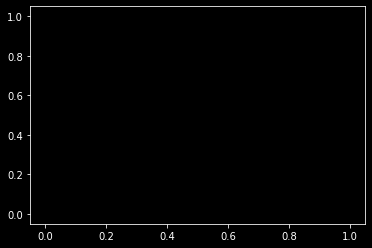

In [10]:
plt.plot(CLoss_Hist[20:])

#plt.plot(get_RA(CLoss_Hist, 10))
#plt.plot(score_Hist[:50])

In [11]:
[0.2, 0.6, 0.2] * 2 + [0.6, 0.2, 0.2]*2

[0.2, 0.6, 0.2, 0.2, 0.6, 0.2, 0.6, 0.2, 0.2, 0.6, 0.2, 0.2]